In [1]:
import pandas as pd
import datetime as dt

# Convert to Datetime type using astype( ) method

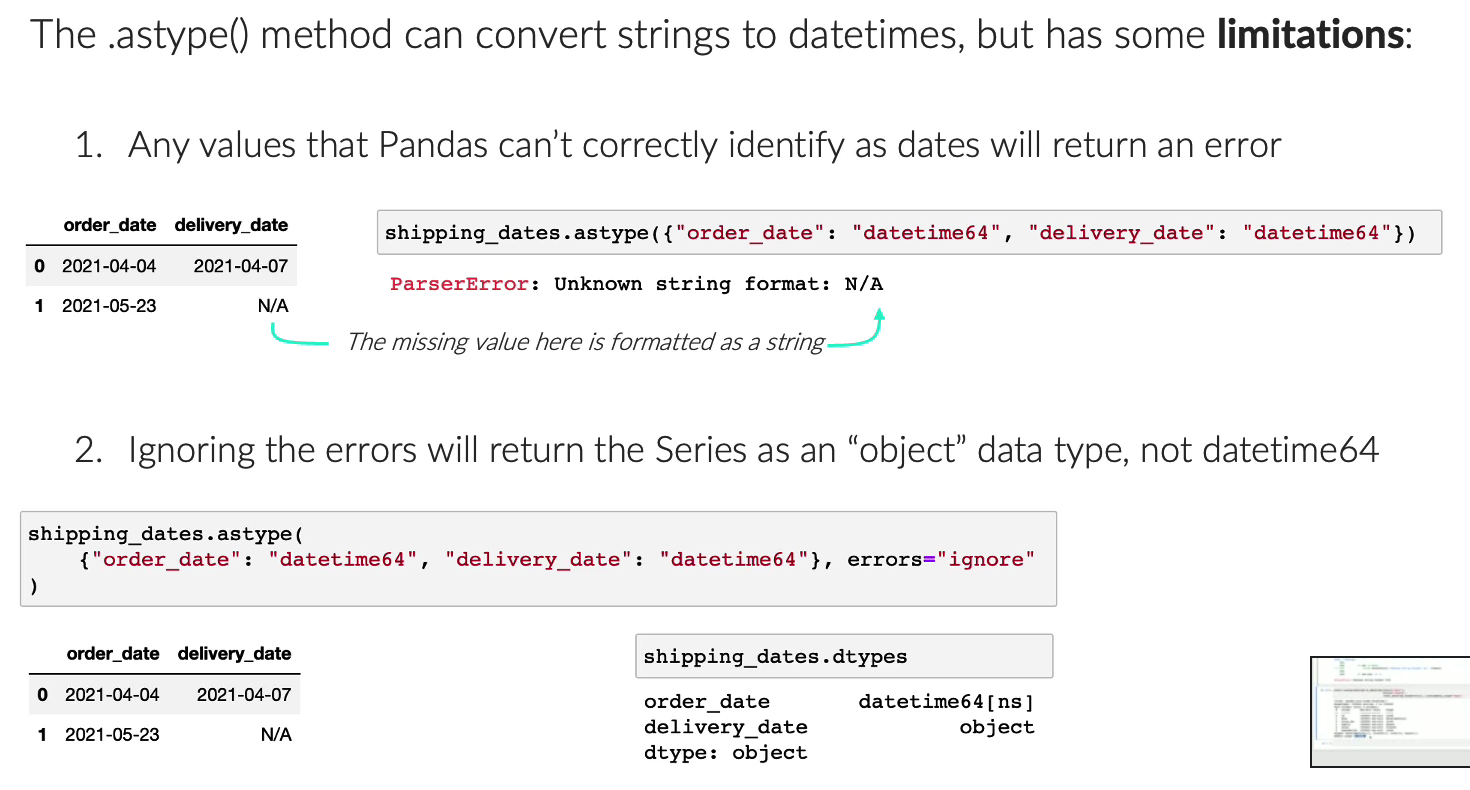

# Timestamp Object
- basically a single moment in time

# Convert to datetime type using pd.todatetime( ) method

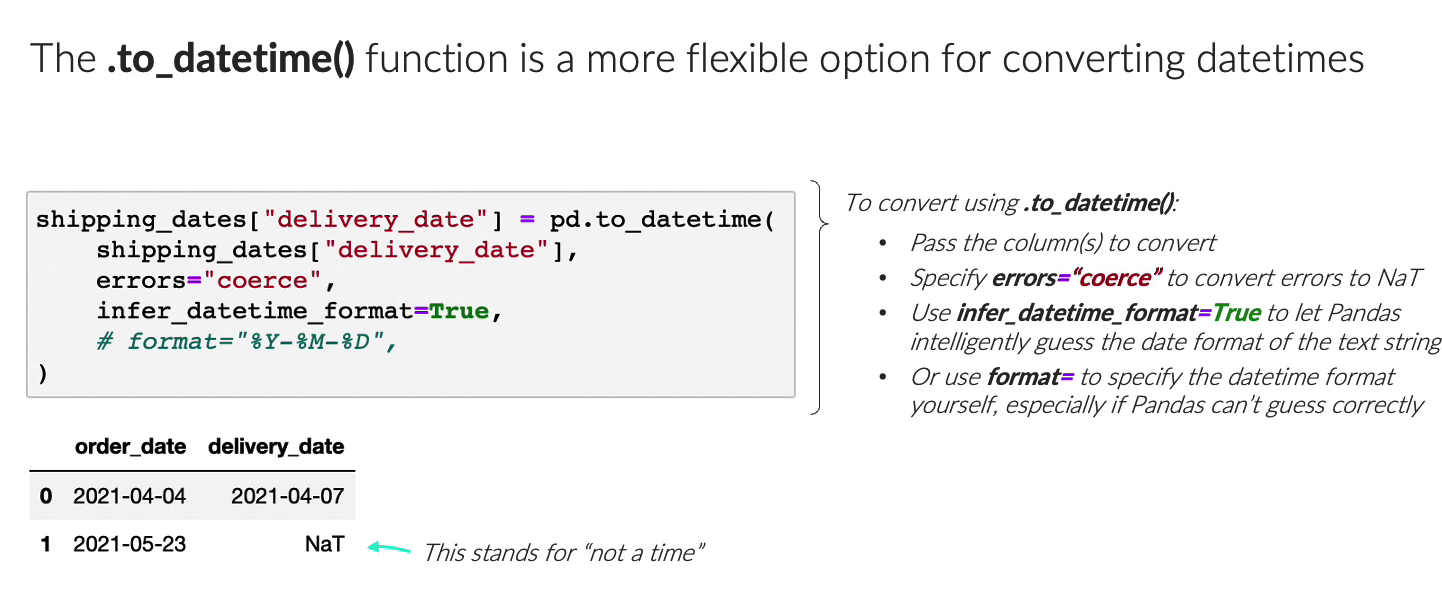

In [2]:
pd.Timestamp("2023-02-8")

Timestamp('2023-02-08 00:00:00')

In [3]:
pd.Timestamp("2023/02/8")

Timestamp('2023-02-08 00:00:00')

In [4]:
pd.Timestamp("2023,02,8")

Timestamp('2023-08-01 00:00:00')

In [5]:
# works but with a warning
pd.Timestamp("13/5/1994")

/tmp/ipykernel_23076/2898284826.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  pd.Timestamp("13/5/1994")


Timestamp('1994-05-13 00:00:00')

In [6]:
# 4th March 2000 
pd.Timestamp("4/3/2000") # gives 3rd April 2000

# So best to use Y/M/D format

Timestamp('2000-04-03 00:00:00')

In [7]:
# Pandas converts to 24 hour format
pd.Timestamp("2023/02/8 5:13:34PM")

Timestamp('2023-02-08 17:13:34')

In [8]:
pd.Timestamp(dt.datetime(2000,2,8,14,15,0))

Timestamp('2000-02-08 14:15:00')

# DateTimeIndex Object
- collection of timestamps

In [9]:
dates= ["2010-01-01", "2010,02,02", "2010/03/03"]
pd.DatetimeIndex(dates)

DatetimeIndex(['2010-01-01', '2010-02-01', '2010-03-03'], dtype='datetime64[ns]', freq=None)

In [10]:
dates = [dt.date(2016,1,10), dt.date(1994,5,13), dt.date(1991,11,26)]
dtIndex = pd.DatetimeIndex(dates)
pd.DatetimeIndex(dates)

DatetimeIndex(['2016-01-10', '1994-05-13', '1991-11-26'], dtype='datetime64[ns]', freq=None)

In [11]:
# Creating a series and assigning the dates datetimeindex as its Index
values = [100,200,300]
pd.Series(data=values, index = dtIndex)

2016-01-10    100
1994-05-13    200
1991-11-26    300
dtype: int64

# pd.to_datetime( ) Method

In [12]:
pd.to_datetime("1994/5/13")
pd.to_datetime(dt.date(2000,9,20))
pd.to_datetime(dt.datetime(2023,2,8,12,45,0))
pd.to_datetime(["1994/5/13", "August 15th, 1947"])

DatetimeIndex(['1994-05-13', '1947-08-15'], dtype='datetime64[ns]', freq=None)

In [13]:
times = pd.Series(["1994/5/13", "August 15th, 1947", "2000/1/10"])
times
# Different Formats as it is a Series

0            1994/5/13
1    August 15th, 1947
2            2000/1/10
dtype: object

In [14]:
pd.to_datetime(times)
# Unifirm DT format in output

0   1994-05-13
1   1947-08-15
2   2000-01-10
dtype: datetime64[ns]

# Handling Garbage date time values with .pd.to_datetime( )

In [15]:
times = pd.Series(["1994/5/13", "August 15th, 1947", "Hello", "2000/1/10", "2020,2,31"])
times

0            1994/5/13
1    August 15th, 1947
2                Hello
3            2000/1/10
4            2020,2,31
dtype: object

In [16]:
# pd.to_datetime(times) gives an error
# To overcome the error, set
# error parameter = "coerce"

pd.to_datetime(times, errors="coerce")
# This converts incompatible values to NaT (Not a Time)


0   1994-05-13
1   1947-08-15
2          NaT
3   2000-01-10
4          NaT
dtype: datetime64[ns]

# Creating Range of Dates with pd.date_range( ) Method

In [17]:
times = pd.date_range(start = "2023-1-1", end = "2023-2-8", freq = "D")
# increments 1 day 
times

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
               '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
               '2023-01-29', '2023-01-30', '2023-01-31', '2023-02-01',
               '2023-02-02', '2023-02-03', '2023-02-04', '2023-02-05',
               '2023-02-06', '2023-02-07', '2023-02-08'],
              dtype='datetime64[ns]', freq='D')

In [18]:
len(times)

39

In [19]:
times = pd.date_range(start = "2023-1-1", end = "2023-2-8", freq = "2D")
# increment of 2 days
times

DatetimeIndex(['2023-01-01', '2023-01-03', '2023-01-05', '2023-01-07',
               '2023-01-09', '2023-01-11', '2023-01-13', '2023-01-15',
               '2023-01-17', '2023-01-19', '2023-01-21', '2023-01-23',
               '2023-01-25', '2023-01-27', '2023-01-29', '2023-01-31',
               '2023-02-02', '2023-02-04', '2023-02-06', '2023-02-08'],
              dtype='datetime64[ns]', freq='2D')

In [20]:
len(pd.Series(times))

20

In [21]:
times = pd.date_range(start = "2023-1-1", end = "2023-2-8", freq = "W")
# By default starts from Sunday
times

DatetimeIndex(['2023-01-01', '2023-01-08', '2023-01-15', '2023-01-22',
               '2023-01-29', '2023-02-05'],
              dtype='datetime64[ns]', freq='W-SUN')

In [22]:
times = pd.date_range(start = "2023-1-1", end = "2023-2-8", freq = "W-FRI")
# starts from Friday and counts week from thereon
# NOTE : 1/1/2023 was sunday
times

DatetimeIndex(['2023-01-06', '2023-01-13', '2023-01-20', '2023-01-27',
               '2023-02-03'],
              dtype='datetime64[ns]', freq='W-FRI')

In [23]:
times = pd.date_range(start = "2023-1-1", end = "2023-2-8", freq = "12H")
# Increment of 12 hours
times

DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 12:00:00',
               '2023-01-02 00:00:00', '2023-01-02 12:00:00',
               '2023-01-03 00:00:00', '2023-01-03 12:00:00',
               '2023-01-04 00:00:00', '2023-01-04 12:00:00',
               '2023-01-05 00:00:00', '2023-01-05 12:00:00',
               '2023-01-06 00:00:00', '2023-01-06 12:00:00',
               '2023-01-07 00:00:00', '2023-01-07 12:00:00',
               '2023-01-08 00:00:00', '2023-01-08 12:00:00',
               '2023-01-09 00:00:00', '2023-01-09 12:00:00',
               '2023-01-10 00:00:00', '2023-01-10 12:00:00',
               '2023-01-11 00:00:00', '2023-01-11 12:00:00',
               '2023-01-12 00:00:00', '2023-01-12 12:00:00',
               '2023-01-13 00:00:00', '2023-01-13 12:00:00',
               '2023-01-14 00:00:00', '2023-01-14 12:00:00',
               '2023-01-15 00:00:00', '2023-01-15 12:00:00',
               '2023-01-16 00:00:00', '2023-01-16 12:00:00',
               '2023-01-

In [24]:
len(times)

77

In [25]:
times = pd.date_range(start = "2023-1-1", end = "2023-5-13", freq = "M")
# Gives last date of each month that falls within the range
times

DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30'], dtype='datetime64[ns]', freq='M')

In [26]:
times = pd.date_range(start = "2023-1-1", end = "2023-5-13", freq = "MS")
# Gives First date of each month that falls within the range
times

DatetimeIndex(['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01'],
              dtype='datetime64[ns]', freq='MS')

In [27]:
times = pd.date_range(start = "2023-1-1", end = "2033-5-13", freq = "A")
# increments by year
pd.Series(times)
# AS for start of year

0   2023-12-31
1   2024-12-31
2   2025-12-31
3   2026-12-31
4   2027-12-31
5   2028-12-31
6   2029-12-31
7   2030-12-31
8   2031-12-31
9   2032-12-31
dtype: datetime64[ns]

In [28]:
times = pd.date_range(start = "2023-1-1", freq = "B", periods=10)
# returns 10 Business Days from start date
# B skips weekends
pd.Series(times)

0   2023-01-02
1   2023-01-03
2   2023-01-04
3   2023-01-05
4   2023-01-06
5   2023-01-09
6   2023-01-10
7   2023-01-11
8   2023-01-12
9   2023-01-13
dtype: datetime64[ns]

In [29]:
times = pd.date_range(start = "2023-1-1", freq = "W-MON", periods=5)
pd.Series(times)

0   2023-01-02
1   2023-01-09
2   2023-01-16
3   2023-01-23
4   2023-01-30
dtype: datetime64[ns]

In [30]:
times = pd.date_range(start = "2023-1-1", freq = "MS", periods=5)
pd.Series(times)

0   2023-01-01
1   2023-02-01
2   2023-03-01
3   2023-04-01
4   2023-05-01
dtype: datetime64[ns]

In [31]:
times = pd.date_range(end = "2023-2-1", freq = "B", periods=10)
pd.Series(times)
# Moves 10 business days backwards

0   2023-01-19
1   2023-01-20
2   2023-01-23
3   2023-01-24
4   2023-01-25
5   2023-01-26
6   2023-01-27
7   2023-01-30
8   2023-01-31
9   2023-02-01
dtype: datetime64[ns]

In [32]:
times = pd.date_range(start = "2023-1-1", end = "2023-5-13", freq = "10D")
day_gaps = pd.Series(times)
day_gaps.head()

0   2023-01-01
1   2023-01-11
2   2023-01-21
3   2023-01-31
4   2023-02-10
dtype: datetime64[ns]

In [33]:
day_gaps.dt.day

0      1
1     11
2     21
3     31
4     10
5     20
6      2
7     12
8     22
9      1
10    11
11    21
12     1
13    11
dtype: int64

In [34]:
day_gaps.dt.month_name()

0      January
1      January
2      January
3      January
4     February
5     February
6        March
7        March
8        March
9        April
10       April
11       April
12         May
13         May
dtype: object

In [35]:
mask = day_gaps.dt.is_quarter_start

In [36]:
day_gaps[mask]

0   2023-01-01
9   2023-04-01
dtype: datetime64[ns]

In [37]:
mask = day_gaps.dt.is_month_start
day_gaps[mask]

0    2023-01-01
9    2023-04-01
12   2023-05-01
dtype: datetime64[ns]

# Import dataset with pandas_datareader Library

In [38]:
import pandas as pd
import datetime as dt
from pandas_datareader import data

In [39]:
stocks = data.DataReader(
    name="MSFT", 
    data_source="stooq", 
    start="2010-01-01", end="2020-12-31"
)

In [40]:
stocks.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,217.822,219.104,215.838,218.528,2.131555e+07
2020-12-30,221.277,221.674,217.595,217.802,2.063381e+07
2020-12-29,222.350,223.214,219.659,220.205,1.771353e+07


# Selecting rows from Df with DatetimeIndex

In [41]:
stocks.loc["2020-12-31"]
stocks.loc[pd.Timestamp("2020/12/31")]
stocks.iloc[0]
stocks.iloc[-1]

Open      2.408540e+01
High      2.443890e+01
Low       2.403580e+01
Close     2.431780e+01
Volume    4.886916e+07
Name: 2010-01-04 00:00:00, dtype: float64

In [42]:
# Puling multiple values
# Here passing a list of dates gives ERROR stocks.loc["2020-12-31", "2020-12-30"]
# So we pass a LIST of  pd.Timestamp methods

stocks.loc[[pd.Timestamp("2020/12/31"), pd.Timestamp("2020/12/30")]]
# Even if one value is invalid it will give error

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,217.822,219.104,215.838,218.528,2.131555e+07
2020-12-30,221.277,221.674,217.595,217.802,2.063381e+07


In [43]:
# Passing a RANGE Of DATES
stocks.loc["2020-12-20" : "2020-12-31"]

/tmp/ipykernel_23076/1186224779.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  stocks.loc["2020-12-20" : "2020-12-31"]


,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,217.822,219.104,215.838,218.528,2.131555e+07
2020-12-30,221.277,221.674,217.595,217.802,2.063381e+07
2020-12-29,222.350,223.214,219.659,220.205,1.771353e+07
2020-12-28,220.504,222.071,219.123,221.010,1.825327e+07
2020-12-24,217.545,219.689,217.326,218.855,1.073870e+07
2020-12-23,219.212,219.639,216.929,217.148,1.903307e+07
2020-12-22,218.795,221.674,217.972,220.017,2.304715e+07
2020-12-21,213.743,220.077,213.484,218.696,3.784488e+07


In [44]:
# Another method 
stocks.truncate(before="2020-12-20", after ="2020-12-31")
# before is the start point
# after is end point

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,217.822,219.104,215.838,218.528,2.131555e+07
2020-12-30,221.277,221.674,217.595,217.802,2.063381e+07
2020-12-29,222.350,223.214,219.659,220.205,1.771353e+07
2020-12-28,220.504,222.071,219.123,221.010,1.825327e+07
2020-12-24,217.545,219.689,217.326,218.855,1.073870e+07
2020-12-23,219.212,219.639,216.929,217.148,1.903307e+07
2020-12-22,218.795,221.674,217.972,220.017,2.304715e+07
2020-12-21,213.743,220.077,213.484,218.696,3.784488e+07


In [45]:
# NOTE in iloc[ ] range, end point is exclusive
stocks.iloc[0:5]

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,217.822,219.104,215.838,218.528,2.131555e+07
2020-12-30,221.277,221.674,217.595,217.802,2.063381e+07
2020-12-29,222.350,223.214,219.659,220.205,1.771353e+07
2020-12-28,220.504,222.071,219.123,221.010,1.825327e+07
2020-12-24,217.545,219.689,217.326,218.855,1.073870e+07


# Timestamp Object Methods and Attributes

In [46]:
stocks.index
someday = stocks.index[100]

In [47]:
someday

Timestamp('2020-08-10 00:00:00')

In [48]:
# Attributes
someday.month
someday.week
someday.is_month_end
someday.is_quarter_start
someday.day

10

In [49]:
# Methods
someday.month_name()
someday.day_name()

'Monday'

In [50]:
stocks.index.day_name()

Index(['Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Thursday', 'Wednesday',
       'Tuesday', 'Monday', 'Friday', 'Thursday',
       ...
       'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Friday',
       'Thursday', 'Wednesday', 'Tuesday', 'Monday'],
      dtype='object', name='Date', length=2769)

In [51]:
# We can add above output as a new col
stocks.insert(0,"Day of Week", stocks.index.day_name() )
stocks

,Day of Week,Open,High,Low,Close,Volume
Date,,,,,,
2020-12-31,Thursday,217.8220,219.1040,215.8380,218.5280,2.131555e+07
2020-12-30,Wednesday,221.2770,221.6740,217.5950,217.8020,2.063381e+07
2020-12-29,Tuesday,222.3500,223.2140,219.6590,220.2050,1.771353e+07
2020-12-28,Monday,220.5040,222.0710,219.1230,221.0100,1.825327e+07
2020-12-24,Thursday,217.5450,219.6890,217.3260,218.8550,1.073870e+07
...,...,...,...,...,...,...
2010-01-08,Friday,23.7837,24.2642,23.7608,24.0934,6.515561e+07
2010-01-07,Thursday,24.0537,24.1232,23.7221,23.9257,6.434577e+07
2010-01-06,Wednesday,24.2642,24.4230,23.9852,24.1758,7.403254e+07


In [52]:
stocks.insert( 1, "Is Start of Month", stocks.index.is_month_start)
stocks

,Day of Week,Is Start of Month,Open,High,Low,Close,Volume
Date,,,,,,,
2020-12-31,Thursday,False,217.8220,219.1040,215.8380,218.5280,2.131555e+07
2020-12-30,Wednesday,False,221.2770,221.6740,217.5950,217.8020,2.063381e+07
2020-12-29,Tuesday,False,222.3500,223.2140,219.6590,220.2050,1.771353e+07
2020-12-28,Monday,False,220.5040,222.0710,219.1230,221.0100,1.825327e+07
2020-12-24,Thursday,False,217.5450,219.6890,217.3260,218.8550,1.073870e+07
...,...,...,...,...,...,...,...
2010-01-08,Friday,False,23.7837,24.2642,23.7608,24.0934,6.515561e+07
2010-01-07,Thursday,False,24.0537,24.1232,23.7221,23.9257,6.434577e+07
2010-01-06,Wednesday,False,24.2642,24.4230,23.9852,24.1758,7.403254e+07


# pd.DateOffset Method
- allows add/sub set amount of time from date index

In [53]:
# With normal dtypes , it is simple to add / sub etc
stocks["High"]+5

# But 
# stocks.index + 5 --> # gives error

Date
2020-12-31    224.1040
2020-12-30    226.6740
2020-12-29    228.2140
2020-12-28    227.0710
2020-12-24    224.6890
                ...   
2010-01-08     29.2642
2010-01-07     29.1232
2010-01-06     29.4230
2010-01-05     29.4389
2010-01-04     29.4389
Name: High, Length: 2769, dtype: float64

In [54]:
stocks.index + pd.DateOffset(days =5)

DatetimeIndex(['2021-01-05', '2021-01-04', '2021-01-03', '2021-01-02',
               '2020-12-29', '2020-12-28', '2020-12-27', '2020-12-26',
               '2020-12-23', '2020-12-22',
               ...
               '2010-01-20', '2010-01-19', '2010-01-18', '2010-01-17',
               '2010-01-16', '2010-01-13', '2010-01-12', '2010-01-11',
               '2010-01-10', '2010-01-09'],
              dtype='datetime64[ns]', name='Date', length=2769, freq=None)

In [55]:
stocks.index - pd.DateOffset(days = 5)

DatetimeIndex(['2020-12-26', '2020-12-25', '2020-12-24', '2020-12-23',
               '2020-12-19', '2020-12-18', '2020-12-17', '2020-12-16',
               '2020-12-13', '2020-12-12',
               ...
               '2010-01-10', '2010-01-09', '2010-01-08', '2010-01-07',
               '2010-01-06', '2010-01-03', '2010-01-02', '2010-01-01',
               '2009-12-31', '2009-12-30'],
              dtype='datetime64[ns]', name='Date', length=2769, freq=None)

In [56]:
# To overwrite
# stocks.index  = stocks.index - pd.DateOffset(days = 5)

In [57]:
# stocks.index + pd.DateOffset(weeks =2)
# stocks.index + pd.DateOffset(months =2)
stocks.index + pd.DateOffset(years =2)

stocks.index + pd.DateOffset(years = 1, months = 6,weeks =2, days = 3, hours = 1, minutes= 15)

DatetimeIndex(['2022-07-17 01:15:00', '2022-07-17 01:15:00',
               '2022-07-16 01:15:00', '2022-07-15 01:15:00',
               '2022-07-11 01:15:00', '2022-07-10 01:15:00',
               '2022-07-09 01:15:00', '2022-07-08 01:15:00',
               '2022-07-05 01:15:00', '2022-07-04 01:15:00',
               ...
               '2011-08-01 01:15:00', '2011-07-31 01:15:00',
               '2011-07-30 01:15:00', '2011-07-29 01:15:00',
               '2011-07-28 01:15:00', '2011-07-25 01:15:00',
               '2011-07-24 01:15:00', '2011-07-23 01:15:00',
               '2011-07-22 01:15:00', '2011-07-21 01:15:00'],
              dtype='datetime64[ns]', name='Date', length=2769, freq=None)

# Timeseries Offsets
- Adding dynamic intervals to Time index
- eg rounding each date to end of each month

In [58]:
stocks = data.DataReader(
    name="MSFT", 
    data_source="stooq", 
    start="2010-01-01", end="2020-12-31"
)

stocks.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,217.822,219.104,215.838,218.528,2.131555e+07
2020-12-30,221.277,221.674,217.595,217.802,2.063381e+07
2020-12-29,222.350,223.214,219.659,220.205,1.771353e+07


In [59]:
stocks.index + pd.tseries.offsets.MonthEnd()

# If we have 1st , 17th or last-1 day of any month , this method will round it off to current month's last date
# But if we have 31st or last date of month it will round it to last date of next month
# eg at index 0 : 31/12/2020 --> 31/1/2021

DatetimeIndex(['2021-01-31', '2020-12-31', '2020-12-31', '2020-12-31',
               '2020-12-31', '2020-12-31', '2020-12-31', '2020-12-31',
               '2020-12-31', '2020-12-31',
               ...
               '2010-01-31', '2010-01-31', '2010-01-31', '2010-01-31',
               '2010-01-31', '2010-01-31', '2010-01-31', '2010-01-31',
               '2010-01-31', '2010-01-31'],
              dtype='datetime64[ns]', name='Date', length=2769, freq=None)

In [60]:
stocks.index - pd.tseries.offsets.MonthEnd()

# will take to last date of previous month

DatetimeIndex(['2020-11-30', '2020-11-30', '2020-11-30', '2020-11-30',
               '2020-11-30', '2020-11-30', '2020-11-30', '2020-11-30',
               '2020-11-30', '2020-11-30',
               ...
               '2009-12-31', '2009-12-31', '2009-12-31', '2009-12-31',
               '2009-12-31', '2009-12-31', '2009-12-31', '2009-12-31',
               '2009-12-31', '2009-12-31'],
              dtype='datetime64[ns]', name='Date', length=2769, freq=None)

In [61]:
# stocks.index + pd.tseries.offsets.MonthBegin()
stocks.index - pd.tseries.offsets.MonthBegin()

DatetimeIndex(['2020-12-01', '2020-12-01', '2020-12-01', '2020-12-01',
               '2020-12-01', '2020-12-01', '2020-12-01', '2020-12-01',
               '2020-12-01', '2020-12-01',
               ...
               '2010-01-01', '2010-01-01', '2010-01-01', '2010-01-01',
               '2010-01-01', '2010-01-01', '2010-01-01', '2010-01-01',
               '2010-01-01', '2010-01-01'],
              dtype='datetime64[ns]', name='Date', length=2769, freq=None)

In [62]:
# nother way to use above method

from pandas.tseries import offsets
stocks.index + offsets.MonthEnd()

DatetimeIndex(['2021-01-31', '2020-12-31', '2020-12-31', '2020-12-31',
               '2020-12-31', '2020-12-31', '2020-12-31', '2020-12-31',
               '2020-12-31', '2020-12-31',
               ...
               '2010-01-31', '2010-01-31', '2010-01-31', '2010-01-31',
               '2010-01-31', '2010-01-31', '2010-01-31', '2010-01-31',
               '2010-01-31', '2010-01-31'],
              dtype='datetime64[ns]', name='Date', length=2769, freq=None)

In [63]:
# Business month end
stocks.index + pd.offsets.BMonthEnd()
# stocks.index + pd.offsets.BMonthBegin()

DatetimeIndex(['2021-01-01', '2021-01-01', '2021-01-01', '2021-01-01',
               '2021-01-01', '2021-01-01', '2021-01-01', '2021-01-01',
               '2021-01-01', '2021-01-01',
               ...
               '2010-02-01', '2010-02-01', '2010-02-01', '2010-02-01',
               '2010-02-01', '2010-02-01', '2010-02-01', '2010-02-01',
               '2010-02-01', '2010-02-01'],
              dtype='datetime64[ns]', name='Date', length=2769, freq=None)

In [64]:
# stocks.index + pd.offsets.YearBegin()
stocks.index - pd.offsets.YearBegin()

DatetimeIndex(['2020-01-01', '2020-01-01', '2020-01-01', '2020-01-01',
               '2020-01-01', '2020-01-01', '2020-01-01', '2020-01-01',
               '2020-01-01', '2020-01-01',
               ...
               '2010-01-01', '2010-01-01', '2010-01-01', '2010-01-01',
               '2010-01-01', '2010-01-01', '2010-01-01', '2010-01-01',
               '2010-01-01', '2010-01-01'],
              dtype='datetime64[ns]', name='Date', length=2769, freq=None)

# Timedelta( ) Object
- represents time span or duration

In [65]:
time_a = pd.Timestamp("2023-2-9")
time_b = pd.Timestamp("1994-5-13")
time_a - time_b

Timedelta('10499 days 00:00:00')

In [66]:
time_b - time_a

Timedelta('-10499 days +00:00:00')

In [67]:
pd.Timedelta(days=3)
pd.Timedelta(weeks = 1, days =3, minutes =45, hours = 1)

Timedelta('10 days 01:45:00')

In [68]:
time_a + pd.Timedelta(days=3)


Timestamp('2023-02-12 00:00:00')

In [69]:
# can use strings to add duration
pd.Timedelta("14 days 6 hours 5 minutes")

Timedelta('14 days 06:05:00')

In [70]:
shipping = pd.read_csv("~/Pandas/Data Set/ecommerce.csv", index_col="ID", parse_dates=["order_date","delivery_date"])
shipping.head(3)

,order_date,delivery_date
ID,,
1,1998-05-24,1999-02-05
2,1992-04-22,1998-03-06
4,1991-02-10,1992-08-26


In [71]:
shipping["Delivery_Time"] = shipping["delivery_date"] - shipping["order_date"]
shipping.head(3)

,order_date,delivery_date,Delivery_Time
ID,,,
1,1998-05-24,1999-02-05,257 days
2,1992-04-22,1998-03-06,2144 days
4,1991-02-10,1992-08-26,563 days


In [72]:
shipping.dtypes

order_date        datetime64[ns]
delivery_date     datetime64[ns]
Delivery_Time    timedelta64[ns]
dtype: object

In [73]:
mask = shipping["Delivery_Time"] > "100 days"
shipping[mask]

,order_date,delivery_date,Delivery_Time
ID,,,
1,1998-05-24,1999-02-05,257 days
2,1992-04-22,1998-03-06,2144 days
4,1991-02-10,1992-08-26,563 days
5,1992-07-21,1997-11-20,1948 days
7,1993-09-02,1998-06-10,1742 days
...,...,...,...
986,1990-12-10,1992-12-16,737 days
990,1991-06-24,1996-02-02,1684 days
991,1991-09-09,1998-03-30,2394 days


In [74]:
shipping["Delivery_Time"].max()
shipping["Delivery_Time"].min()


Timedelta('8 days 00:00:00')